
Лабораторна робота №1 на тему: "Лінійна регресія" Молодід Єгор ДА-02


In [1]:
# завантажимо бібліотеку NumPy та Matplotlib
!pip install numpy
!python -m pip install -U matplotlib

In [1]:
# імпортуємо бібліотеки
import numpy as np
import csv
from matplotlib import pyplot as plt

In [2]:
# функція для зчитування рядків із csv файлу
def read_csv(path):
    file = open(path)    
    next(csv.reader(file))
    data = []
    for row in csv.reader(file):
        data.append(row)
        row.pop(0)
    return data

In [3]:
# безпосереднє зчитування рядків із csv файлу із даними для тренування моделі
train_data = read_csv(r"C:\Users\starodubbb\Desktop\lab1\lab_1_train.csv")

In [4]:
train_data

[['0.0', '20.14901424590337'],
 ['0.010101010101010102', '19.978722729850666'],
 ['0.020202020202020204', '20.234710601834248'],
 ['0.030303030303030304', '20.51751501752847'],
 ['0.04040404040404041', '20.010562068391078'],
 ['0.05050505050505051', '20.030769013925347'],
 ['0.06060606060606061', '20.59497596586434'],
 ['0.07070707070707072', '20.371644560160014'],
 ['0.08080808080808081', '20.020773845835677'],
 ['0.09090909090909091', '20.344586194893974'],
 ['0.10101010101010102', '20.062994894176462'],
 ['0.11111111111111112', '20.082503296151145'],
 ['0.12121212121212122', '20.315012923894052'],
 ['0.13131313131313133', '19.688642189228922'],
 ['0.14141414141414144', '19.765352933074375'],
 ['0.15151515151515152', '20.13434404425801'],
 ['0.16161616161616163', '20.019382987131994'],
 ['0.17171717171717174', '20.437708543212924'],
 ['0.18181818181818182', '20.09122914098'],
 ['0.19191919191919193', '19.960147273437798'],
 ['0.20202020202020204', '20.84373503471687'],
 ['0.212121212

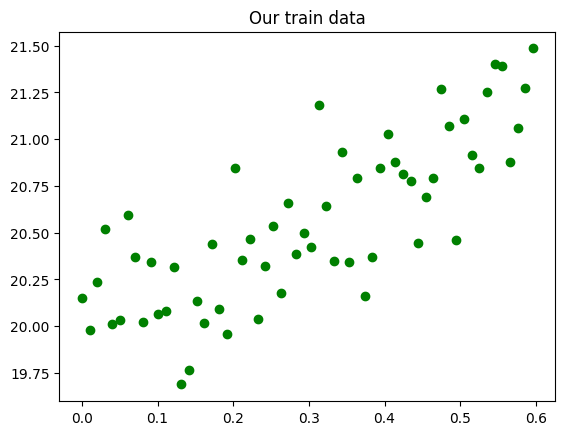

In [5]:
x_column_train = [float(row[0]) for row in train_data]
y_column_train = [float(row[1]) for row in train_data]
#x_train, y_train = zip(*train_data)
plt.title("Our train data")
plt.plot(x_column_train, y_column_train, "go")
#дані із датасету для тренування: візуальне представлення

In [6]:
# функція для обчислення значення лінійної регресії (значення y при відомих beta_0, beta_1, х)
def linear_regression(beta_0, beta_1, x):
    return beta_0 + (beta_1 * x)

# функція для обчислення середньої квадратичної похибки між прогнозованими та реальними значеннями
def loss(predicted_value, true_value):
    return np.mean((np.array(predicted_value) - np.array(true_value)) ** 2)

# функція для навчання моделі лінійної регресії та знаходження beta_0 та beta_1 (застосовується градієнтний спуск)
def train(train_data):
    tolerance = 0.000001  
    learning_rate = 0.005
    delta = 100
    i = 1
    
    #початкові рандомні beta_0(перетин) та beta_1(нахил)
    beta_0 = float(np.random.randn())
    beta_1 = float(np.random.randn())
    
    #колонка іксів та ігриків із датасету
    x_true  = np.array(train_data)[:, 0].astype(float) 
    y_true = np.array(train_data)[:, 1].astype(float)
    
    #перші прогнозовані y та середня квадратична похибка
    y_predicted = linear_regression(beta_0, beta_1, x_true)
    loss_value = loss(y_predicted, y_true)
    
    while tolerance < delta:
             
        y_dif = y_true - y_predicted
        
        #похідні функції втрат відносно beta_0 та beta_1
        beta_0_der = -2 / len(y_dif) * np.sum(y_dif)
        beta_1_der = -2 / len(y_dif) * np.sum(np.multiply(y_dif, x_true))
        
        #оновлені beta_0 та beta_1
        beta_0 = beta_0 - learning_rate * beta_0_der
        beta_1 = beta_1 - learning_rate * beta_1_der
        
        #оновлені прогнозовані y та оновлені втрати
        y_predicted = linear_regression(beta_0, beta_1, x_true)
        loss_current_value = loss(y_predicted, y_true)
        
        #зміна втрат
        delta = loss_value - loss_current_value
        loss_value = loss_current_value
        
        print(f"i = {i}: beta_0 = {beta_0}; beta_1 = {beta_1}; loss value = {loss_value}")
        
        i += 1
     
    #остаточні перетин(beta_0) та нахил(beta_1)
    return {
        "beta_0" : beta_0,
        "beta_1" : beta_1
    }
   

In [7]:
# навчаємо модель
beta_0_1 = train(train_data)

i = 1: beta_0 = 0.9399967205118404; beta_1 = 2.4729368503755857; loss value = 356.25860478079034
i = 2: beta_0 = 1.1287235329861893; beta_1 = 2.529022414291191; loss value = 348.5482262481577
i = 3: beta_0 = 1.3153959536857431; beta_1 = 2.5844786484310522; loss value = 341.0052121718712
i = 4: beta_0 = 1.5000364018038443; beta_1 = 2.6393124258406795; loss value = 333.6259294172534
i = 5: beta_0 = 1.6826670518616147; beta_1 = 2.693530544555009; loss value = 326.406823717577
i = 6: beta_0 = 1.863309836378194; beta_1 = 2.7471397284170354; loss value = 319.3444179620036
i = 7: beta_0 = 2.0419864485118366; beta_1 = 2.8001466278875062; loss value = 312.43531052068545
i = 8: beta_0 = 2.2187183446721854; beta_1 = 2.8525578208457847; loss value = 305.67617360622745
i = 9: beta_0 = 2.393526747104035; beta_1 = 2.904379813381967; loss value = 299.0637516707175
i = 10: beta_0 = 2.5664326464428977; beta_1 = 2.955619040580359; loss value = 292.5948598375549
i = 11: beta_0 = 2.7374568042426795; beta_1

i = 9818: beta_0 = 19.84694779665454; beta_1 = 2.3472987354732204; loss value = 0.0772007404272911
i = 9819: beta_0 = 19.846979474568432; beta_1 = 2.3471954073535706; loss value = 0.07719840471668597
i = 9820: beta_0 = 19.84701114360011; beta_1 = 2.347092108206244; loss value = 0.0771960703157237
i = 9821: beta_0 = 19.84704280375206; beta_1 = 2.3469888380231168; loss value = 0.07719373722367022
i = 9822: beta_0 = 19.847074455026775; beta_1 = 2.3468855967960676; loss value = 0.07719140543979158
i = 9823: beta_0 = 19.847106097426742; beta_1 = 2.3467823845169775; loss value = 0.07718907496335405
i = 9824: beta_0 = 19.84713773095445; beta_1 = 2.34667920117773; loss value = 0.07718674579362471
i = 9825: beta_0 = 19.847169355612387; beta_1 = 2.34657604677021; loss value = 0.07718441792987091
i = 9826: beta_0 = 19.84720097140304; beta_1 = 2.3464729212863062; loss value = 0.07718209137136058
i = 9827: beta_0 = 19.847232578328896; beta_1 = 2.346369824717908; loss value = 0.07717976611736142
i =

In [8]:
# зчитаємо дані для тесту моделі
test_data = read_csv(r"C:\Users\starodubbb\Desktop\lab1\lab_1_test.csv")

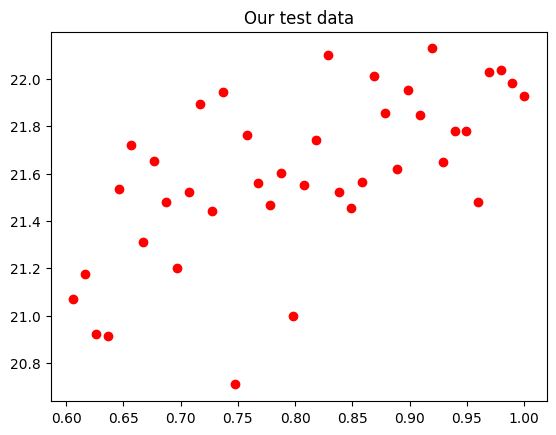

In [9]:
# візуально представимо їх
x_column_test = [float(row[0]) for row in test_data]
y_column_test = [float(row[1]) for row in test_data]
plt.title("Our test data")
plt.plot(x_column_test, y_column_test, "ro")

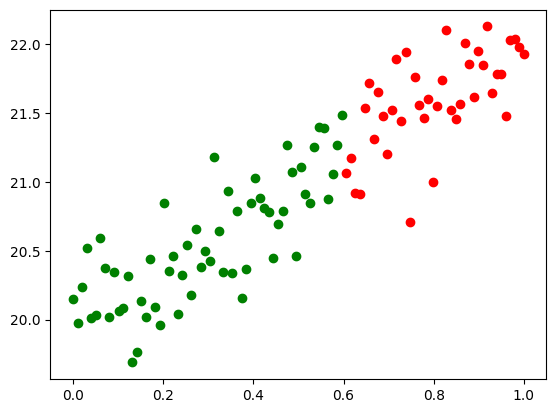

In [10]:
# візуально представимо дані для тренування та тестування моделі (зелений - тренування, червоний - тестування)
plt.plot(x_column_train, y_column_train, "go",
    x_column_test, y_column_test, "ro")

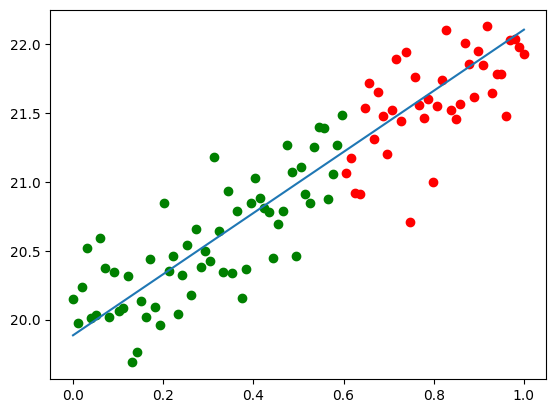

In [11]:
# візуально представимо дані для тренування та тестування моделі, та лінію регресії
plt.plot(x_column_train, y_column_train, "go",
    x_column_test, y_column_test, "ro", 
    [0, 1], [linear_regression(beta_0_1["beta_0"], beta_0_1["beta_1"], 0), linear_regression(beta_0_1["beta_0"], beta_0_1["beta_1"], 1)])          


In [12]:
#порахуємо функціію втрат на тестових даних
y_model = []
for x in x_column_test:
    y_model.append(linear_regression(beta_0_1["beta_0"], beta_0_1["beta_1"], x))
loss_value = loss(y_model, y_column_test)

In [25]:
loss_value

0.07972844934458334